###Modelo de Red Neuronal para clasificación con función Círculo

In [30]:
from pybrain.tools.shortcuts import buildNetwork
from pybrain.datasets import SupervisedDataSet
from pybrain.supervised.trainers import BackpropTrainer
from sklearn.cross_validation import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline

#### 1) Se definen la funcion de clasificación Círculo y generamos sets de datos

In [31]:
entradas=100
X=np.array([[random.uniform(-4.0,4.0),
             random.uniform(-4.0,4.0)] 
            for x in range(entradas)])
y=[]

In [32]:
for i in range(entradas):
    circle = (X[i,0]**2)+(X[i,1]**2)
    if (circle <= 4):
        y.append(1) 
    else:
        y.append(0)    
y=np.array(y)

####2) Separamos porcentaje de entrenamiento y visualizamos

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,train_size=0.75)
print len(X_train), len(X_test)

75 25


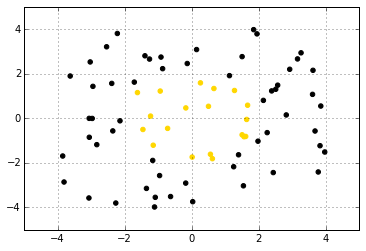

In [34]:
plt.scatter(X_train[:,0], X_train[:,1], 
            color=['black' if i==0 else 'gold' for i in Y_train] )
plt.grid()

####3) Definimos una topología para la red

In [35]:
# Neuronas en capa entrada, cuantas neuronas en capa intermedia, capa final
net = buildNetwork(2, 3, 1)
ds = SupervisedDataSet(2, 1)

In [37]:
ds.setField('input', pd.DataFrame(X_train))
ds.setField('target', pd.DataFrame(Y_train))

####4) Se entrena la red con el método backpropagation

In [38]:
entrena=500
trainer = BackpropTrainer(net,ds) 
for i in range(entrena):
    trainer.train()
print("entrenó")

entrenó


#### 5) Visualización de clasificación con red neuronal

In [39]:
x1t = np.arange(-4.01,4.00,0.01) 
x2t = []
x3t = []
z = []

In [40]:
for i in range(len(x1t)):
    for j in range(len(x1t)):
        x2t.append(x1t[i])
        x3t.append(x1t[(len(x1t)-1)-j])
        xtemp = [x1t[i],x1t[(len(x1t)-1)-j]]
        z.append(net.activate(xtemp))

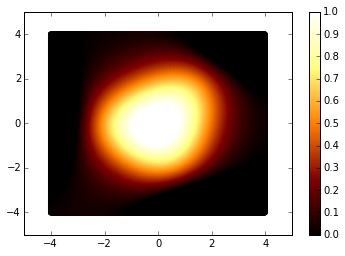

In [41]:
sc = plt.scatter(x2t, x3t, c=z, vmin=0, vmax=1, s=30, cmap=plt.cm.get_cmap('afmhot'), edgecolors='none')
plt.colorbar(sc)
plt.show()